In this assignment, we shall scrape novels from the web and plot frequency distributions. We use, Python packages requests, beautifulsoup, Natural Language ToolKit(nltk).

We use project Gutenberg(https://www.gutenberg.org/)to scrape the novel(Moby Dick)

assign the filepath to the url object:url

In [41]:
#assign url
url = 'https://www.gutenberg.org/files/2701/2701-h/2701-h.htm'

Let's fetch the HTML of the website. We shall use requests package. requests comes with get function. let's get the request and check the object type.

In [42]:
#import requests
import requests

#assign url
url = 'https://www.gutenberg.org/files/2701/2701-h/2701-h.htm'

#make the request and check object type:
r = requests.get(url)
type(r)

requests.models.Response

We obtained a Response object. In the Response object we have an attribute text
that allows to get HTML. we will print HTML to check.

In [43]:
#extract the HTML from response object and print it:
html = r.text
#print(html)

We don't need the HTML, all we need is the text in it. We need to wrangle the data to extract the novel.

STEP A: Get the text from HTML. We will use BeautifulSoup package.
After creating the soup, we can get the .get_text() method to extract the text.

In [44]:
#import BeautifulSoup from bs4:
from bs4 import BeautifulSoup

#create a BeautifulSoup object from HTML:
soup = BeautifulSoup(html,  "html5lib")
type(soup)

bs4.BeautifulSoup

From the above Soup object, we can extract interesting stuff about website you're scraping such as title:

In [45]:
#get soup title:
soup.title

<title>
      Moby Dick; Or the Whale, by Herman Melville
    </title>

or title as a string

In [46]:
#get soup title as string:
soup.title.string

'\n      Moby Dick; Or the Whale, by Herman Melville\n    '

of all URL's found in a page's <a> tags (hyperlink's)

In [47]:
#get hyperlinks from soup and check out first several:
soup.findAll('a')[:8]

[<a href="#link2H_4_0002"> ETYMOLOGY. </a>,
 <a href="#link2H_4_0003"> EXTRACTS (Supplied by a Sub-Sub-Librarian).
         </a>,
 <a href="#link2HCH0001"> CHAPTER 1. Loomings. </a>,
 <a href="#link2HCH0002"> CHAPTER 2. The Carpet-Bag. </a>,
 <a href="#link2HCH0003"> CHAPTER 3. The Spouter-Inn. </a>,
 <a href="#link2HCH0004"> CHAPTER 4. The Counterpane. </a>,
 <a href="#link2HCH0005"> CHAPTER 5. Breakfast. </a>,
 <a href="#link2HCH0006"> CHAPTER 6. The Street. </a>]

Let's extract the text from the soup and we have .get_text() method.

In [48]:
#get the text out of soup and print it:
text = soup.get_text()
#print(text)

In this text, we have some unwanted data both at the start and the end. It's good practice to remove these for better understanding.

As we got the text, let's see how many times each word appears and plot the
frequency histogram : Natural language processing for our help.

STEP B : Extract words from text with NLP

a. We tokenize the text i.e splitting into tokens(i.e words)
b. Remove stopwords(like the, a which occur often in all english texts)

Step 1 : We need to tokenize the text, split into words we need to split off the parts of the text that are separated by whitespaces. 
We will use Regular expressions, regex is a seq of char's that define a search
pattern.

How Regex works?
You have the string 'peter piper picked a peck of pickled peppers' and you want to extract from the list of all words in it that start with a 'p'.
The regular expression that matches all words beginning with 'p' is 'p\w+'. Let's unpack this:

a. the 'p' at the beginning of the regular expression means that you'll only match sequences of characters that start with a 'p';

b. the '\w' is a special character that will match any alphanumeric A-z, a-z, 0-9, along with underscores;

c. The '+' tells you that the previous character in the regex can appear as many times as you want in strings that you;re trying to match. This means that '\w+' will match arbitrary sequences of alphanumeric characters and underscores.


We will use a package 're' to extract all words with 'p' from the scentence
'peter piper picked a peck of pickled peppers' as a trial:

In [50]:
#import regex package
import re

#define senctence
sentence = 'peter piper picked a peck of pickled peppers'

#define regex
ps = 'p\w+'

#find all words in sentence that match the regex and print them.
re.findall(ps, sentence)

['peter', 'piper', 'picked', 'peck', 'pickled', 'peppers']

In [51]:
#find all words and print them.
re.findall('\w+', sentence)

['peter', 'piper', 'picked', 'a', 'peck', 'of', 'pickled', 'peppers']

Let's apply the same for string of Moby dick:

In [52]:
#find all words in moby dick and print several of them
tokens = re.findall('\w+', text)
tokens[:8]

['Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville']

We can also do this by nltk : 

In [55]:
#import RegexpTokenize from nltk.tokenize
from nltk.tokenize import RegexpTokenizer

#creating tokenizer
tokenizer = RegexpTokenizer('\w+')

#create tokens
tokens = tokenizer.tokenize(text)
tokens[:8]

['Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville']

As we see the word 'Or', 'O' is in upper case, we need to count both 'Or' and
'or' as one word. for this, we need to convert all the words in caps to lower case. .lower() method helps up here.

In [64]:
#initialize a new list
words = []

#loop over list tokens and make lower case.
for word in tokens:
    words.append(word.lower())

#print several items from list as a check
words[:8]

['moby', 'dick', 'or', 'the', 'whale', 'by', 'herman', 'melville']

Step 2: Remove stop words

It is common practice to remove words that appear alot in the English language such as 'the', 'of' and 'a' (known as stopwords) because they're not so interesting. For more on all of these techniques.

The package nltk has a list of stopwords in English which you'll now store as sw and of which you'll print the first several elements.

In [57]:
#import nltk

#get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('English')
sw[:5]

['i', 'me', 'my', 'myself', 'we']

In [65]:
# Import nltk
import nltk

# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('english')
sw[:5]

# Initialize new list
words_ns = []

# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Print several list items as sanity check
words_ns[:5]

['moby', 'dick', 'whale', 'herman', 'melville']

Answering our question, What are the most frequency words used in the novel
Moby Dick and often they occur. To achieve this, we use nltk.FreqDist();

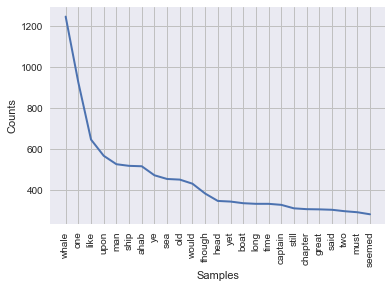

In [66]:
#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)

We plotted a frequency distribution plot. We can read the common words, along with their frequency. 

From this we conclude that the word 'whale' is the most common word(minus the stop words) and it occurs > 1200 times.

Since, the Project Gutenberg has many novels we can make these word frequency histograms of it, write a function which does all of it.

In [67]:
def plot_word_freq(url):
    """Takes a url (from Project Gutenberg) and plots a word frequency
    distribution"""
    # Make the request and check object type
    r = requests.get(url)
    # Extract HTML from Response object and print
    html = r.text
    # Create a BeautifulSoup object from the HTML
    soup = BeautifulSoup(html, "html5lib")
    # Get the text out of the soup and print it
    text = soup.get_text()
    # Create tokenizer
    tokenizer = RegexpTokenizer('\w+')
    # Create tokens
    tokens = tokenizer.tokenize(text)
    # Initialize new list
    words = []
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())
    # Get English stopwords and print some of them
    sw = nltk.corpus.stopwords.words('english')
    # Initialize new list
    words_ns = []
    # Add to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
    # Create freq dist and plot
    freqdist1 = nltk.FreqDist(words_ns)
    freqdist1.plot(25)

Now use the function to plot word frequency distributions from 
other texts on Project Gutenberg:

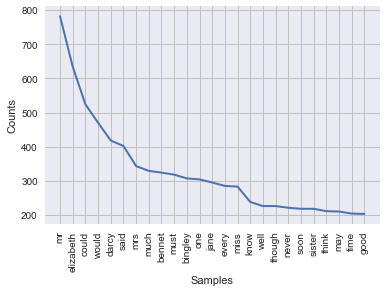

In [68]:
#Pride and Prejudice:
plot_word_freq('https://www.gutenberg.org/files/42671/42671-h/42671-h.htm')

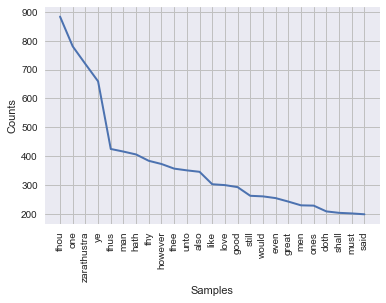

In [69]:
#THUS SPAKE ZARATHUSTRA
plot_word_freq('http://www.gutenberg.org/files/1998/1998-h/1998-h.htm')

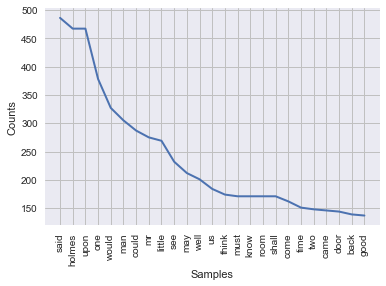

In [70]:
#The Adventures of Sherlock Holmes
plot_word_freq('http://www.gutenberg.org/files/1661/1661-h/1661-h.htm')